In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import auc

In [3]:
df = pd.read_csv('Dataset/flood.csv')
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [5]:
df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


In [6]:
df.isnull().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

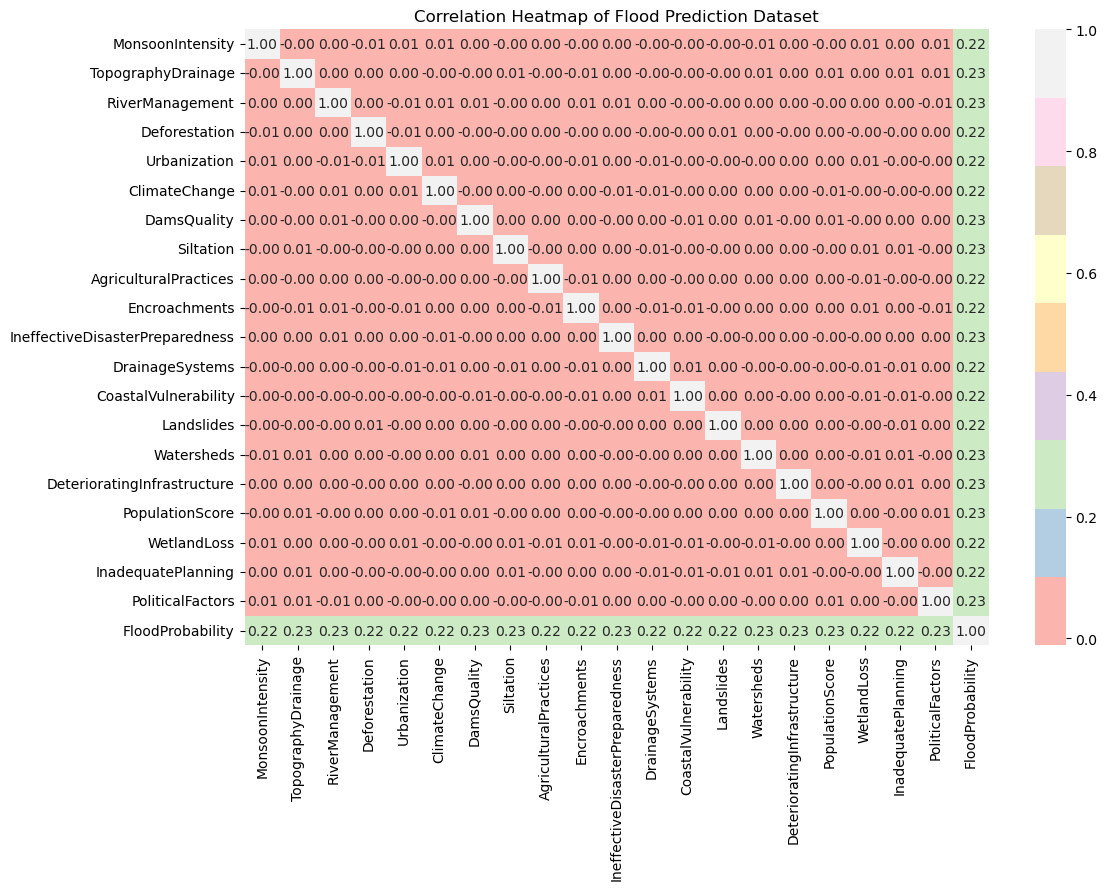

In [7]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.set_palette("muted")

sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt=".2f")
plt.title('Correlation Heatmap of Flood Prediction Dataset')
plt.show()

# **PCA**

In [9]:
df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


In [10]:
X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.85)  # Retain 85% of the variance
X_pca = pca.fit_transform(X_scaled)

# View the explained variance ratio (helps understand how much variance each component explains)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_)}")

# number of components you kept
print(f"Number of components kept: {pca.n_components_}")

# Optionally, create a DataFrame with the principal components
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])


df_pca.head()

Explained variance ratio: [0.05204681 0.0516829  0.05126316 0.05098779 0.05084653 0.05061655
 0.0504878  0.05020763 0.05018506 0.04999201 0.04986266 0.04963876
 0.04954339 0.04939905 0.0492787  0.04919839 0.04899852]
Total explained variance: 0.8542356845696837
Number of components kept: 17


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-2.874710,0.387969,0.446951,0.389410,-0.634913,1.863121,0.601505,1.016634,-0.618981,-0.996786,-0.385489,-0.242440,1.564307,-0.820246,-0.296448,0.539630,-0.395084
1,-0.674721,2.198435,-2.562340,-0.328104,0.133221,0.779086,2.623107,0.204497,-1.095927,0.886842,1.043546,-0.407815,0.742916,-0.225466,1.555655,0.719423,2.089896
2,1.567035,0.634858,0.639772,-0.417030,-1.724476,-0.229331,-0.320138,0.841091,0.957926,-0.831706,1.098602,-1.331735,0.539453,-2.360521,2.384135,-0.234033,0.365931
3,-0.014448,0.094412,2.283706,0.297989,1.068315,-0.079682,0.817750,-2.515729,1.572000,0.721463,0.061030,1.313290,0.246432,0.017411,-0.094274,-0.488823,1.112216
4,-1.482442,0.345402,-0.937020,-0.577262,0.008798,0.514191,-0.186314,0.945791,0.383690,0.239349,-0.482127,0.065525,0.090065,-1.764407,0.059680,1.319290,0.635484


In [11]:

vif_data = pd.DataFrame()
vif_data["feature"] = [f"PC{i+1}" for i in range(X_pca.shape[1])]
vif_data["VIF"] = [variance_inflation_factor(X_pca, i) for i in range(X_pca.shape[1])]

print(vif_data)


   feature  VIF
0      PC1  1.0
1      PC2  1.0
2      PC3  1.0
3      PC4  1.0
4      PC5  1.0
5      PC6  1.0
6      PC7  1.0
7      PC8  1.0
8      PC9  1.0
9     PC10  1.0
10    PC11  1.0
11    PC12  1.0
12    PC13  1.0
13    PC14  1.0
14    PC15  1.0
15    PC16  1.0
16    PC17  1.0


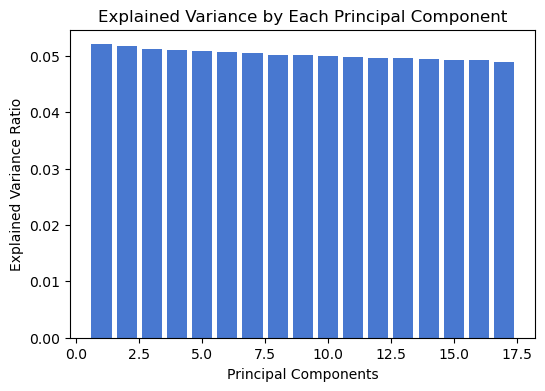

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Each Principal Component')
plt.show()


# **OLS**

In [14]:
# Separate predictors and target
X = df_pca
y = df['FloodProbability']

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reset index on both X and y to ensure they align
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


# Add constant for OLS intercept
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# initiating time
start_time = time.time()

# defining OLS model
ols_model = sm.OLS(y_train, X_train_const)
ols_results = ols_model.fit()

# ending time
end_time = time.time()
elapsed_time = end_time - start_time

# printing execution time of OLS
print(f"OLS execution time: {end_time - start_time:.2f} seconds")

print(ols_results.summary())

# Predict and evaluate
y_pred = ols_results.predict(X_test_const)

# calculating mse and r2
mse = np.mean((y_test - y_pred) ** 2)
r2_test = r2_score(y_test, y_pred)

print(f"\nMean Squared Error on Test Set: {mse:.4f}")
print(f"Adjusted R-squared: {r2_test:.4f}")


OLS execution time: 0.16 seconds
                            OLS Regression Results                            
Dep. Variable:       FloodProbability   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                 1.615e+04
Date:                Thu, 17 Jul 2025   Prob (F-statistic):               0.00
Time:                        12:20:16   Log-Likelihood:             1.0427e+05
No. Observations:               40000   AIC:                        -2.085e+05
Df Residuals:                   39982   BIC:                        -2.084e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.49

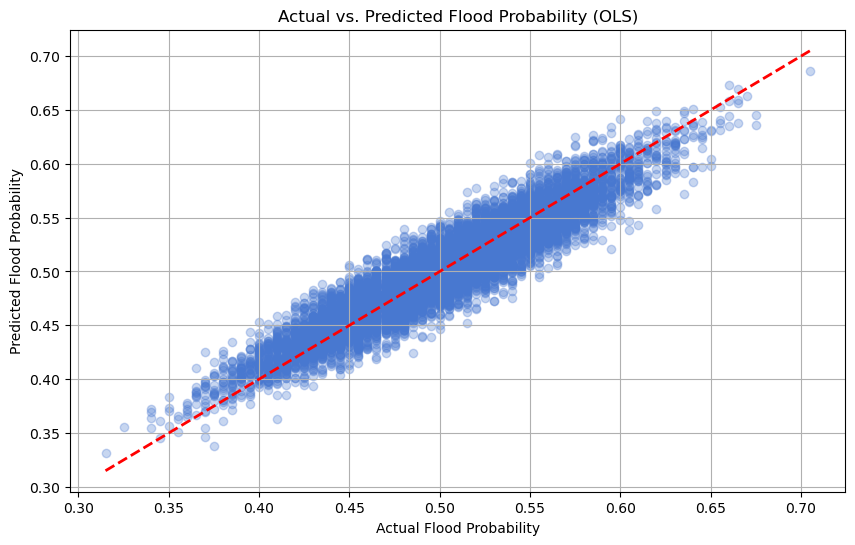

In [15]:
# actual vs predicted graph for OLS

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Flood Probability')
plt.ylabel('Predicted Flood Probability')
plt.title('Actual vs. Predicted Flood Probability (OLS)')
plt.grid(True)
plt.show()

# **Logistic Regression (Serially & Parallelly)**

In [17]:
# Converting both continuous predictions and true values to binary for classification metrics
y = [1 if x >= 0.49 else 0 for x in y]  # Thresholding predictions

In [18]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# defining user defined function to train the model and measure execution time
def train_and_measure_time(model, X_train, y_train, X_test, y_test):
    # Measure start time
    start_time = time.time()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict the labels and probabilities on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class (1)

    # Measure execution time
    end_time = time.time()
    exec_time = end_time - start_time

    return exec_time, y_pred, y_pred_proba


In [20]:
# defining a user-defined function to evaluate model performance with ROC curve, AUC, Confusion Matrix, Classification Report, 
# and False Positives/Negatives counts
def evaluate_model_accuracy(y_test, y_pred_proba, y_pred, model="Logistic Regression"):
    """
    Args:
    - y_test: True labels of the test set
    - y_pred_proba: Predicted probabilities for the positive class (1)
    - y_pred: Predicted labels (0 or 1)
    - model: String specifying model name. Default is "Serial".
    
    Returns:
    - Displays ROC curve, Confusion Matrix, Classification Report, False Positives/Negatives
    """
    
    # ROC Curve and AUC Score
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # The diagonal line (random classifier)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({model})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Transpose the confusion matrix to swap axes (Actual on X, Predicted on Y)
    cm_swapped = cm.T  # Transpose

    # Visualize the Confusion Matrix with swapped axes
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_swapped, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Actual 0', 'Actual 1'],  # Actual values on X-axis
                yticklabels=['Predicted 0', 'Predicted 1'])  # Predicted values on Y-axis
    plt.xlabel('True Label')  # X-axis represents True Labels
    plt.ylabel('Predicted Label')  # Y-axis represents Predicted Labels
    plt.title(f'Confusion Matrix ({model})')
    plt.show()

    # Classification Report
    print(f"\nClassification Report ({model}):")
    print(classification_report(y_test, y_pred))

    # False Positives and False Negatives (from confusion matrix)
    tn, fp, fn, tp = cm.ravel()  # Extract true negatives, false positives, false negatives, and true positives

    print(f"\nFalse Positives (Type I error): {fp}")
    print(f"False Negatives (Type II error): {fn}")

In [61]:
# Defining the Logistic Regression Models

# Serial Execution: Logistic Regression with n_jobs=1
log_reg_serial = LogisticRegression(random_state=42, n_jobs=1)

# Parallel Execution: Logistic Regression with n_jobs=-1
log_reg_parallel = LogisticRegression(random_state=42, n_jobs=-1)

# --- Serial Execution ---

print("=== Logistic Regression Serial Execution ===")
serial_exec_time, y_pred_serial, y_pred_proba_serial = train_and_measure_time(log_reg_serial, X_train, y_train, X_test, y_test)

print(f"Serial Execution Time: {serial_exec_time:.2f} seconds")


# --- Parallel Execution ---

print("\n=== Logistic Regression Parallel Execution ===")
parallel_exec_time, y_pred_parallel, y_pred_proba_parallel = train_and_measure_time(log_reg_parallel, X_train, y_train, X_test, y_test)

print(f"Parallel Execution Time: {parallel_exec_time:.2f} seconds")


=== Logistic Regression Serial Execution ===
Serial Execution Time: 0.18 seconds

=== Logistic Regression Parallel Execution ===
Parallel Execution Time: 0.16 seconds


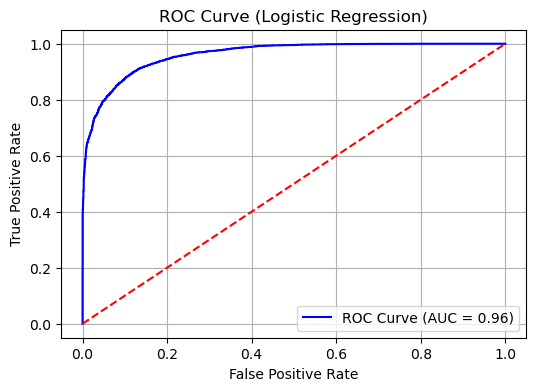

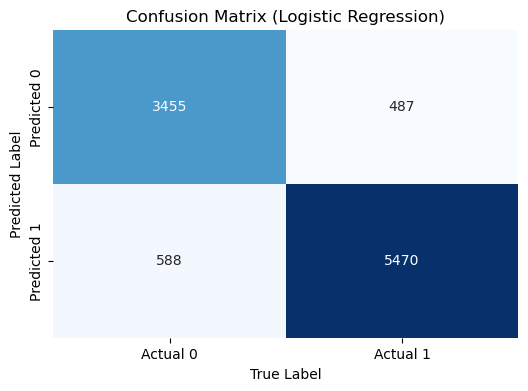


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      4043
           1       0.90      0.92      0.91      5957

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


False Positives (Type I error): 588
False Negatives (Type II error): 487


In [22]:
# evaluating model
evaluate_model_accuracy(y_test, y_pred_proba_serial, y_pred_serial, model="Logistic Regression")

# **Random Forest Classifier (Serially & Parallelly)**

In [24]:
# Serial Execution: Random Forest Classifier with n_jobs=1
rf_clf_serial = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=1)

# Parallel Execution: Random Forest Classifier with n_jobs=-1
rf_clf_parallel = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)


# --- Serial Execution ---

print("=== Random Forest Classifier Serial Execution ===")
serial_exec_time, y_pred_serial, y_pred_proba_serial = train_and_measure_time(rf_clf_serial, X_train, y_train, X_test, y_test)

print(f"Serial Execution Time: {serial_exec_time:.2f} seconds")


# --- Parallel Execution ---

print("\n=== Random Forest Classifier Parallel Execution ===")
parallel_exec_time, y_pred_parallel, y_pred_proba_parallel = train_and_measure_time(rf_clf_parallel, X_train, y_train, X_test, y_test)

print(f"Parallel Execution Time: {parallel_exec_time:.2f} seconds")


=== Random Forest Classifier Serial Execution ===
Serial Execution Time: 19.83 seconds

=== Random Forest Classifier Parallel Execution ===
Parallel Execution Time: 5.02 seconds


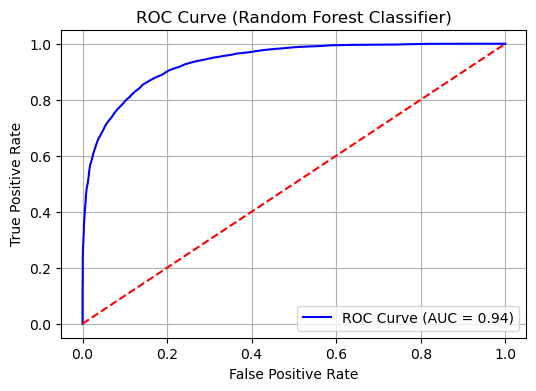

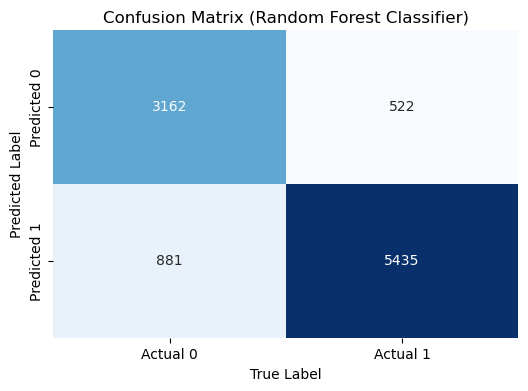


Classification Report (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      4043
           1       0.86      0.91      0.89      5957

    accuracy                           0.86     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.86      0.86     10000


False Positives (Type I error): 881
False Negatives (Type II error): 522


In [46]:
# evaluating model
evaluate_model_accuracy(y_test, y_pred_proba_serial, y_pred_serial, model="Random Forest Classifier")